# Regular Expressions

A regular expression (or RE) specifies a set of strings that matches it; the functions in this module let you check if a particular string matches a given regular expression (or if a given regular expression matches a particular string, which comes down to the same thing). 

<P>
The special characters are:
<DL>
<DT><STRONG>"<tt class="character">.</tt>"</STRONG></DT>
<DD>(Dot.)  In the default mode, this matches any
character except a newline.  If the <tt class="constant">DOTALL</tt> flag has been
specified, this matches any character including a newline.

<P>
</DD>
<DT><STRONG>"<tt class="character">^</tt>"</STRONG></DT>
<DD>(Caret.)  Matches the start of the
string, and in <tt class="constant">MULTILINE</tt> mode also matches immediately
after each newline.

<P>
</DD>
<DT><STRONG>"<tt class="character">\$</tt>"</STRONG></DT>
<DD>Matches the end of the string or just before the
newline at the end of the string, and in <tt class="constant">MULTILINE</tt> mode
also matches before a newline.  <tt class="regexp">foo</tt> matches both 'foo' and
'foobar', while the regular expression <tt class="regexp">foo$</tt> matches only
'foo'.  More interestingly, searching for <tt class="regexp">foo.\$</tt> in
'foo1&#92;nfoo2&#92;n' matches 'foo2' normally,
but 'foo1' in <tt class="constant">MULTILINE</tt> mode.

<P>
</DD>
<DT><STRONG>"<tt class="character">*</tt>"</STRONG></DT>
<DD>Causes the resulting RE to
match 0 or more repetitions of the preceding RE, as many repetitions
as are possible.  <tt class="regexp">ab*</tt> will
match 'a', 'ab', or 'a' followed by any number of 'b's.

<P>
</DD>
<DT><STRONG>"<tt class="character">+</tt>"</STRONG></DT>
<DD>Causes the
resulting RE to match 1 or more repetitions of the preceding RE.
<tt class="regexp">ab+</tt> will match 'a' followed by any non-zero number of 'b's; it
will not match just 'a'.

<P>
</DD>
<DT><STRONG>"<tt class="character">?</tt>"</STRONG></DT>
<DD>Causes the resulting RE to
match 0 or 1 repetitions of the preceding RE.  <tt class="regexp">ab?</tt> will
match either 'a' or 'ab'.

<P>
</DD>
<DT><STRONG><code>*?</code>, <code>+?</code>, <code>??</code></STRONG></DT>
<DD>The "<tt class="character">*</tt>",
"<tt class="character">+</tt>", and "<tt class="character">?</tt>" qualifiers are all <i class="dfn">greedy</i>; they
match as much text as possible.  Sometimes this behaviour isn't
desired; if the RE <tt class="regexp">&lt;.*&gt;</tt> is matched against
<code>'&lt;H1&gt;title&lt;/H1&gt;'</code>, it will match the entire string, and not just
<code>'&lt;H1&gt;'</code>.  Adding "<tt class="character">?</tt>" after the qualifier makes it
perform the match in <i class="dfn">non-greedy</i> or <i class="dfn">minimal</i> fashion; as
<em>few</em> characters as possible will be matched.  Using <tt class="regexp">.*?</tt>
in the previous expression will match only <code>'&lt;H1&gt;'</code>.

<P>
</DD>
<DT><STRONG><code>{<var>m</var>}</code></STRONG></DT>
<DD>Specifies that exactly <var>m</var> copies of the previous RE should be
matched; fewer matches cause the entire RE not to match.  For example,
<tt class="regexp">a{6}</tt> will match exactly six "<tt class="character">a</tt>" characters, but
not five.

<P>
</DD>
<DT><STRONG><code>{<var>m</var>,<var>n</var>}</code></STRONG></DT>
<DD>Causes the resulting RE to match from
<var>m</var> to <var>n</var> repetitions of the preceding RE, attempting to
match as many repetitions as possible.  For example, <tt class="regexp">a{3,5}</tt>
will match from 3 to 5 "<tt class="character">a</tt>" characters.  Omitting <var>m</var>
specifies a lower bound of zero, 
and omitting <var>n</var> specifies an infinite upper bound.  As an
example, <tt class="regexp">a{4,}b</tt> will match <code>aaaab</code> or a thousand
"<tt class="character">a</tt>" characters followed by a <code>b</code>, but not <code>aaab</code>.
The comma may not be omitted or the modifier would be confused with
the previously described form.

<P>
</DD>
<DT><STRONG><code>{<var>m</var>,<var>n</var>}?</code></STRONG></DT>
<DD>Causes the resulting RE to
match from <var>m</var> to <var>n</var> repetitions of the preceding RE,
attempting to match as <em>few</em> repetitions as possible.  This is
the non-greedy version of the previous qualifier.  For example, on the
6-character string <code>'aaaaaa'</code>, <tt class="regexp">a{3,5}</tt> will match 5
"<tt class="character">a</tt>" characters, while <tt class="regexp">a{3,5}?</tt> will only match 3
characters.

<P>
</DD>
<DT><STRONG>"<tt class="character">&#92;</tt>"</STRONG></DT>
<DD>Either escapes special characters (permitting
you to match characters like "<tt class="character">*</tt>", "<tt class="character">?</tt>", and so
forth), or signals a special sequence; special sequences are discussed
below.

<P>
If you're not using a raw string to
express the pattern, remember that Python also uses the
backslash as an escape sequence in string literals; if the escape
sequence isn't recognized by Python's parser, the backslash and
subsequent character are included in the resulting string.  However,
if Python would recognize the resulting sequence, the backslash should
be repeated twice.  This is complicated and hard to understand, so
it's highly recommended that you use raw strings for all but the
simplest expressions.

<P>
</DD>
<DT><STRONG><code>[]</code></STRONG></DT>
<DD>Used to indicate a set of characters.  Characters can
be listed individually, or a range of characters can be indicated by
giving two characters and separating them by a "<tt class="character">-</tt>".  Special
characters are not active inside sets.  For example, <tt class="regexp">[akm$]</tt>
will match any of the characters "<tt class="character">a</tt>", "<tt class="character">k</tt>",
"<tt class="character">m</tt>", or "<tt class="character">$</tt>"; <tt class="regexp">[a-z]</tt>
will match any lowercase letter, and <code>[a-zA-Z0-9]</code> matches any
letter or digit.  Character classes such as <code>&#92;w</code> or <code>&#92;S</code>
(defined below) are also acceptable inside a range.  If you want to
include a "<tt class="character">]</tt>" or a "<tt class="character">-</tt>" inside a set, precede it with a
backslash, or place it as the first character.  The
pattern <tt class="regexp">[]]</tt> will match <code>']'</code>, for example.

<P>
You can match the characters not within a range by <i class="dfn">complementing</i>
the set.  This is indicated by including a
"<tt class="character">^</tt>" as the first character of the set;
"<tt class="character">^</tt>" elsewhere will simply match the
"<tt class="character">^</tt>" character.  For example,
<tt class="regexp">[^5]</tt> will match
any character except "<tt class="character">5</tt>", and
<tt class="regexp">[^<code>^</code>]</tt> will match any character
except "<tt class="character">^</tt>".

<P>
</DD>
<DT><STRONG>"<tt class="character">|</tt>"</STRONG></DT>
<DD><code>A|B</code>, where A and B can be arbitrary REs,
creates a regular expression that will match either A or B.  An
arbitrary number of REs can be separated by the "<tt class="character">|</tt>" in this
way.  This can be used inside groups (see below) as well.  As the target
string is scanned, REs separated by "<tt class="character">|</tt>" are tried from left to
right. When one pattern completely matches, that branch is accepted.
This means that once <code>A</code> matches, <code>B</code> will not be tested further,
even if it would produce a longer overall match.  In other words, the
"<tt class="character">|</tt>" operator is never greedy.  To match a literal "<tt class="character">|</tt>",
use <tt class="regexp">&#92;|</tt>, or enclose it inside a character class, as in <tt class="regexp">[|]</tt>.

<P>
</DD>
<DT><STRONG><code>(...)</code></STRONG></DT>
<DD>Matches whatever regular expression is inside the
parentheses, and indicates the start and end of a group; the contents
of a group can be retrieved after a match has been performed, and can
be matched later in the string with the <tt class="regexp">&#92;<var>number</var></tt> special
sequence, described below.  To match the literals "<tt class="character">(</tt>" or
"<tt class="character">)</tt>", use <tt class="regexp">&#92;(</tt> or <tt class="regexp">&#92;)</tt>, or enclose them
inside a character class: <tt class="regexp">[(] [)]</tt>.

<P>
</DD>
<DT><STRONG><code>(?...)</code></STRONG></DT>
<DD>This is an extension notation (a "<tt class="character">?</tt>"
following a "<tt class="character">(</tt>" is not meaningful otherwise).  The first
character after the "<tt class="character">?</tt>"
determines what the meaning and further syntax of the construct is.
Extensions usually do not create a new group;
<tt class="regexp">(?P&lt;<var>name</var>&gt;...)</tt> is the only exception to this rule.
Following are the currently supported extensions.

<P>
</DD>
<DT><STRONG><code>(?iLmsux)</code></STRONG></DT>
<DD>(One or more letters from the set "<tt class="character">i</tt>",
"<tt class="character">L</tt>", "<tt class="character">m</tt>", "<tt class="character">s</tt>", "<tt class="character">u</tt>",
"<tt class="character">x</tt>".)  The group matches the empty string; the letters set
the corresponding flags (<tt class="constant">re.I</tt>, <tt class="constant">re.L</tt>,
<tt class="constant">re.M</tt>, <tt class="constant">re.S</tt>, <tt class="constant">re.U</tt>, <tt class="constant">re.X</tt>)
for the entire regular expression.  This is useful if you wish to
include the flags as part of the regular expression, instead of
passing a <var>flag</var> argument to the <tt class="function">compile()</tt> function.

<P>
Note that the <tt class="regexp">(?x)</tt> flag changes how the expression is parsed.
It should be used first in the expression string, or after one or more
whitespace characters.  If there are non-whitespace characters before
the flag, the results are undefined.

<P>
</DD>
<DT><STRONG><code>(?:...)</code></STRONG></DT>
<DD>A non-grouping version of regular parentheses.
Matches whatever regular expression is inside the parentheses, but the
substring matched by the
group <em>cannot</em> be retrieved after performing a match or
referenced later in the pattern.

<P>
</DD>
<DT><STRONG><code>(?P&lt;<var>name</var>&gt;...)</code></STRONG></DT>
<DD>Similar to regular parentheses, but
the substring matched by the group is accessible via the symbolic group
name <var>name</var>.  Group names must be valid Python identifiers, and
each group name must be defined only once within a regular expression.  A
symbolic group is also a numbered group, just as if the group were not
named.  So the group named 'id' in the example above can also be
referenced as the numbered group 1.

<P>
For example, if the pattern is
<tt class="regexp">(?P&lt;id&gt;[a-zA-Z_]&#92;w*)</tt>, the group can be referenced by its
name in arguments to methods of match objects, such as
<code>m.group('id')</code> or <code>m.end('id')</code>, and also by name in
pattern text (for example, <tt class="regexp">(?P=id)</tt>) and replacement text
(such as <code>&#92;g&lt;id&gt;</code>).

<P>
</DD>
<DT><STRONG><code>(?P=<var>name</var>)</code></STRONG></DT>
<DD>Matches whatever text was matched by the
earlier group named <var>name</var>.

<P>
</DD>
<DT><STRONG><code>(?#...)</code></STRONG></DT>
<DD>A comment; the contents of the parentheses are
simply ignored.

<P>
</DD>
<DT><STRONG><code>(?=...)</code></STRONG></DT>
<DD>Matches if <tt class="regexp">...</tt> matches next, but doesn't
consume any of the string.  This is called a lookahead assertion.  For
example, <tt class="regexp">Isaac (?=Asimov)</tt> will match <code>'Isaac&nbsp;'</code> only if it's
followed by <code>'Asimov'</code>.

<P>
</DD>
<DT><STRONG><code>(?!...)</code></STRONG></DT>
<DD>Matches if <tt class="regexp">...</tt> doesn't match next.  This
is a negative lookahead assertion.  For example,
<tt class="regexp">Isaac (?!Asimov)</tt> will match <code>'Isaac&nbsp;'</code> only if it's <em>not</em>
followed by <code>'Asimov'</code>.

<P>
</DD>
<DT><STRONG><code>(?&lt;=...)</code></STRONG></DT>
<DD>Matches if the current position in the string
is preceded by a match for <tt class="regexp">...</tt> that ends at the current
position.  This is called a <i class="dfn">positive lookbehind assertion</i>.
<tt class="regexp">(?&lt;=abc)def</tt> will find a match in "<tt class="samp">abcdef</tt>", since the
lookbehind will back up 3 characters and check if the contained
pattern matches.  The contained pattern must only match strings of
some fixed length, meaning that <tt class="regexp">abc</tt> or <tt class="regexp">a|b</tt> are
allowed, but <tt class="regexp">a*</tt> and <tt class="regexp">a{3,4}</tt> are not.  Note that
patterns which start with positive lookbehind assertions will never
match at the beginning of the string being searched; you will most
likely want to use the <tt class="function">search()</tt> function rather than the
<tt class="function">match()</tt> function:

<P>
<div class="verbatim"><pre>
&gt;&gt;&gt; import re
&gt;&gt;&gt; m = re.search('(?&lt;=abc)def', 'abcdef')
&gt;&gt;&gt; m.group(0)
'def'
</pre></div>

<P>
This example looks for a word following a hyphen:

<P>
<div class="verbatim"><pre>
&gt;&gt;&gt; m = re.search('(?&lt;=-)\w+', 'spam-egg')
&gt;&gt;&gt; m.group(0)
'egg'
</pre></div>

<P>
</DD>
<DT><STRONG><code>(?&lt;!...)</code></STRONG></DT>
<DD>Matches if the current position in the string
is not preceded by a match for <tt class="regexp">...</tt>.  This is called a
<i class="dfn">negative lookbehind assertion</i>.  Similar to positive lookbehind
assertions, the contained pattern must only match strings of some
fixed length.  Patterns which start with negative lookbehind
assertions may match at the beginning of the string being searched.

<P>
</DD>
<DT><STRONG><code>(?(<var>id/name</var>)yes-pattern|no-pattern)</code></STRONG></DT>
<DD>Will try to match
with <tt class="regexp">yes-pattern</tt> if the group with given <var>id</var> or <var>name</var>
exists, and with <tt class="regexp">no-pattern</tt> if it doesn't. <tt class="regexp">|no-pattern</tt>
is optional and can be omitted. For example, 
<tt class="regexp">(&lt;)?(&#92;w+@&#92;w+(?:&#92;.&#92;w+)+)(?(1)&gt;)</tt> is a poor email matching
pattern, which will match with <code>'&lt;user@host.com&gt;'</code> as well as
<code>'user@host.com'</code>, but not with <code>'&lt;user@host.com'</code>.

<span class="versionnote">New in version 2.4.</span>

<P>
</DD>
</DL>

<P>
The special sequences consist of "<tt class="character">&#92;</tt>" and a character from the
list below.  If the ordinary character is not on the list, then the
resulting RE will match the second character.  For example,
<tt class="regexp">&#92;$</tt> matches the character "<tt class="character">$</tt>".
<DL>
<DT><STRONG><code>&#92;<var>number</var></code></STRONG></DT>
<DD>Matches the contents of the group of the
same number.  Groups are numbered starting from 1.  For example,
<tt class="regexp">(.+) &#92;1</tt> matches <code>'the the'</code> or <code>'55 55'</code>, but not
<code>'the end'</code> (note
the space after the group).  This special sequence can only be used to
match one of the first 99 groups.  If the first digit of <var>number</var>
is 0, or <var>number</var> is 3 octal digits long, it will not be interpreted
as a group match, but as the character with octal value <var>number</var>.
Inside the "<tt class="character">[</tt>" and "<tt class="character">]</tt>" of a character class, all numeric
escapes are treated as characters.

<P>
</DD>
<DT><STRONG><code>&#92;A</code></STRONG></DT>
<DD>Matches only at the start of the string.

<P>
</DD>
<DT><STRONG><code>&#92;b</code></STRONG></DT>
<DD>Matches the empty string, but only at the
beginning or end of a word.  A word is defined as a sequence of
alphanumeric or underscore characters, so the end of a word is indicated by
whitespace or a non-alphanumeric, non-underscore character.  Note that 
<code>&#92;b</code> is defined as the boundary between <code>&#92;w</code> and <code>&#92;
W</code>, so the precise set of characters deemed to be alphanumeric depends on the
values of the <code>UNICODE</code> and <code>LOCALE</code> flags.  Inside a character
range, <tt class="regexp">&#92;b</tt> represents the backspace character, for compatibility
with Python's string literals.

<P>
</DD>
<DT><STRONG><code>&#92;B</code></STRONG></DT>
<DD>Matches the empty string, but only when it is <em>not</em>
at the beginning or end of a word.  This is just the opposite of <code>&#92;
b</code>, so is also subject to the settings of <code>LOCALE</code> and <code>UNICODE</code>.

<P>
</DD>
<DT><STRONG><code>&#92;d</code></STRONG></DT>
<DD>When the <tt class="constant">UNICODE</tt> flag is not specified, matches
any decimal digit; this is equivalent to the set <tt class="regexp">[0-9]</tt>. 
With <tt class="constant">UNICODE</tt>, it will match whatever is classified as a digit
in the Unicode character properties database.

<P>
</DD>
<DT><STRONG><code>&#92;D</code></STRONG></DT>
<DD>When the <tt class="constant">UNICODE</tt> flag is not specified, matches
any non-digit character; this is equivalent to the set 
<tt class="regexp">[^0-9]</tt>.  With <tt class="constant">UNICODE</tt>, it will match 
anything other than character marked as digits in the Unicode character 
properties database.

<P>
</DD>
<DT><STRONG><code>&#92;s</code></STRONG></DT>
<DD>When the <tt class="constant">LOCALE</tt> and <tt class="constant">UNICODE</tt>
flags are not specified, matches any whitespace character; this is
equivalent to the set <tt class="regexp">[ &#92;t&#92;n&#92;r&#92;f&#92;v]</tt>.
With <tt class="constant">LOCALE</tt>, it will match this set plus whatever characters
are defined as space for the current locale. If <tt class="constant">UNICODE</tt> is set,
this will match the characters <tt class="regexp">[ &#92;t&#92;n&#92;r&#92;f&#92;v]</tt> plus
whatever is classified as space in the Unicode character properties
database.

<P>
</DD>
<DT><STRONG><code>&#92;S</code></STRONG></DT>
<DD>When the <tt class="constant">LOCALE</tt> and <tt class="constant">UNICODE</tt>
flags are not specified, matches any non-whitespace character; this is
equivalent to the set <tt class="regexp">[^ &#92;t&#92;n&#92;r&#92;f&#92;v]</tt>
With <tt class="constant">LOCALE</tt>, it will match any character not in this set,
and not defined as space in the current locale. If <tt class="constant">UNICODE</tt>
is set, this will match anything other than <tt class="regexp">[ &#92;t&#92;n&#92;r&#92;f&#92;v]</tt>
and characters marked as space in the Unicode character properties database.

<P>
</DD>
<DT><STRONG><code>&#92;w</code></STRONG></DT>
<DD>When the <tt class="constant">LOCALE</tt> and <tt class="constant">UNICODE</tt>
flags are not specified, matches any alphanumeric character and the
underscore; this is equivalent to the set
<tt class="regexp">[a-zA-Z0-9_]</tt>.  With <tt class="constant">LOCALE</tt>, it will match the set
<tt class="regexp">[0-9_]</tt> plus whatever characters are defined as alphanumeric for
the current locale.  If <tt class="constant">UNICODE</tt> is set, this will match the
characters <tt class="regexp">[0-9_]</tt> plus whatever is classified as alphanumeric
in the Unicode character properties database.

<P>
</DD>
<DT><STRONG><code>&#92;W</code></STRONG></DT>
<DD>When the <tt class="constant">LOCALE</tt> and <tt class="constant">UNICODE</tt>
flags are not specified, matches any non-alphanumeric character; this
is equivalent to the set <tt class="regexp">[^a-zA-Z0-9_]</tt>.   With
<tt class="constant">LOCALE</tt>, it will match any character not in the set
<tt class="regexp">[0-9_]</tt>, and not defined as alphanumeric for the current locale.
If <tt class="constant">UNICODE</tt> is set, this will match anything other than
<tt class="regexp">[0-9_]</tt> and characters marked as alphanumeric in the Unicode
character properties database.

<P>
</DD>
<DT><STRONG><code>&#92;Z</code></STRONG></DT>
<DD>Matches only at the end of the string.

<P>
</DD>
</DL>

<P>
Most of the standard escapes supported by Python string literals are
also accepted by the regular expression parser:

<P>
<div class="verbatim"><pre>
\a      \b      \f      \n
\r      \t      \v      \x
\\
</pre></div>

<P>
Octal escapes are included in a limited form: If the first digit is a
0, or if there are three octal digits, it is considered an octal
escape. Otherwise, it is a group reference.  As for string literals,
octal escapes are always at most three digits in length.

<P>

### Using re.search( ) to find particular lines in a txt file

Like `find()` we can use `re.search()` to find, and in this case extract, some particular line we are searching.

Let us have a look of what kind of mailbox file we have here to analyse.

In [3]:
N = 50
#using a mailbox txt sample
with open('mbox-short.txt') as file:
        head = [next(file).strip() for x in range(N)]
print(head)

['From stephen.marquard@uct.ac.za Sat Jan  5 09:14:16 2008', 'Return-Path: <postmaster@collab.sakaiproject.org>', 'Received: from murder (mail.umich.edu [141.211.14.90])', 'by frankenstein.mail.umich.edu (Cyrus v2.3.8) with LMTPA;', 'Sat, 05 Jan 2008 09:14:16 -0500', 'X-Sieve: CMU Sieve 2.3', 'Received: from murder ([unix socket])', 'by mail.umich.edu (Cyrus v2.2.12) with LMTPA;', 'Sat, 05 Jan 2008 09:14:16 -0500', 'Received: from holes.mr.itd.umich.edu (holes.mr.itd.umich.edu [141.211.14.79])', 'by flawless.mail.umich.edu () with ESMTP id m05EEFR1013674;', 'Sat, 5 Jan 2008 09:14:15 -0500', 'Received: FROM paploo.uhi.ac.uk (app1.prod.collab.uhi.ac.uk [194.35.219.184])', 'BY holes.mr.itd.umich.edu ID 477F90B0.2DB2F.12494 ;', '5 Jan 2008 09:14:10 -0500', 'Received: from paploo.uhi.ac.uk (localhost [127.0.0.1])', 'by paploo.uhi.ac.uk (Postfix) with ESMTP id 5F919BC2F2;', 'Sat,  5 Jan 2008 14:10:05 +0000 (GMT)', 'Message-ID: <200801051412.m05ECIaH010327@nakamura.uits.iupui.edu>', 'Mime-Ver

We can count how many emails we have in this mailbox file by searching 'From:' in the text.

I'll use re.compile even it usually it is used on big data text sets, but it is a neater wat to use `regex`.

In [4]:
import re

with open('mbox-short.txt') as file:
    regexp = re.compile('From:')
    count = 0
    for line in file.readlines():
        #next I use search() with the previous compiled regexp
        if regexp.search(line):
            count += 1
    print('Number of emails: ', count)

Number of emails:  27


We can search more type of words we are interested with `|` "or" in the expresion:

In [5]:
with open('mbox-short.txt') as file:
    #we can search for different words with |
    #we can choose case sensitive here by [hH]
    regexp = re.compile('[hH]ello|Hi|Hey')
    count = 0
    for line in file.readlines():
        #next I use search() with the previous compiled regexp
        if regexp.search(line):
            count += 1
    print("Number 'Hello's inside the emails: ", count)

Number 'Hello's inside the emails:  3


`[]` these parenthesis are used to find also ranges of characters or numbers like `[a-z]` or `[0-9]`

Another thing we could do here is to look at from whom the emails came from.

In [6]:
with open('mbox-short.txt') as file:
    for line in file:
        line = line.strip() #just to remove space between lines
        if re.search('From:', line):
            print(line)

From: stephen.marquard@uct.ac.za
From: louis@media.berkeley.edu
From: zqian@umich.edu
From: rjlowe@iupui.edu
From: zqian@umich.edu
From: rjlowe@iupui.edu
From: cwen@iupui.edu
From: cwen@iupui.edu
From: gsilver@umich.edu
From: gsilver@umich.edu
From: zqian@umich.edu
From: gsilver@umich.edu
From: wagnermr@iupui.edu
From: zqian@umich.edu
From: antranig@caret.cam.ac.uk
From: gopal.ramasammycook@gmail.com
From: david.horwitz@uct.ac.za
From: david.horwitz@uct.ac.za
From: david.horwitz@uct.ac.za
From: david.horwitz@uct.ac.za
From: stephen.marquard@uct.ac.za
From: louis@media.berkeley.edu
From: louis@media.berkeley.edu
From: ray@media.berkeley.edu
From: cwen@iupui.edu
From: cwen@iupui.edu
From: cwen@iupui.edu


### Using re.search( ) with `^` to find particular lines that starts with something

We can fine-tune what is matched by adding special characters to the string:

In [7]:
with open('mbox-short.txt') as file:
    for line in file:
        line = line.strip()
        if re.search('^From: s', line): #here I use ^ as starts with
            print(line)

From: stephen.marquard@uct.ac.za
From: stephen.marquard@uct.ac.za


### Wild-Card Characters 

 - The .(dot) character matches any character
 - If we add the \*(asterisk) character, the next character can "any number of charcaters" distant from the previous

For example: ^X-S.\*: where "X-S" is the matching line where we have ":" after any space of characters.


It's like we search for a line starting with "*X-S*", followed by some number of characters, followed by a colon "*:*".

In [9]:
with open('mbox-short.txt') as file:
    for line in file:
        line = line.strip()
        if re.search('^X-S.*:', line):
            print(line)

X-Sieve: CMU Sieve 2.3
X-Sieve: CMU Sieve 2.3
X-Sieve: CMU Sieve 2.3
X-Sieve: CMU Sieve 2.3
X-Sieve: CMU Sieve 2.3
X-Sieve: CMU Sieve 2.3
X-Sieve: CMU Sieve 2.3
X-Sieve: CMU Sieve 2.3
X-Sieve: CMU Sieve 2.3
X-Sieve: CMU Sieve 2.3
X-Sieve: CMU Sieve 2.3
X-Sieve: CMU Sieve 2.3
X-Sieve: CMU Sieve 2.3
X-Sieve: CMU Sieve 2.3
X-Sieve: CMU Sieve 2.3
X-Sieve: CMU Sieve 2.3
X-Sieve: CMU Sieve 2.3
X-Sieve: CMU Sieve 2.3
X-Sieve: CMU Sieve 2.3
X-Sieve: CMU Sieve 2.3
X-Sieve: CMU Sieve 2.3
X-Sieve: CMU Sieve 2.3
X-Sieve: CMU Sieve 2.3
X-Sieve: CMU Sieve 2.3
X-Sieve: CMU Sieve 2.3
X-Sieve: CMU Sieve 2.3
X-Sieve: CMU Sieve 2.3


Below we can find in a similar way all the emails sent at time 11

In [10]:
with open('mbox-short.txt') as file:
    for line in file:
        line = line.strip()
        if re.search('^From.*11', line):
            print(line)

From cwen@iupui.edu Fri Jan  4 11:37:30 2008
From cwen@iupui.edu Fri Jan  4 11:35:08 2008
From gsilver@umich.edu Fri Jan  4 11:12:37 2008
From gsilver@umich.edu Fri Jan  4 11:11:52 2008
From zqian@umich.edu Fri Jan  4 11:11:03 2008
From gsilver@umich.edu Fri Jan  4 11:10:22 2008


Depending on how "clean" and what data we need to extract, we may want to narrow down the searching.

For example we can:
 - Match the starting line with "^X-"
 - Match any non whitespace character with "\S" one or more times "+"
 - and should then have "Confidence:" colon

"^X-\S+Confidence:"

In [11]:
with open('mbox-short.txt') as file:
    for line in file:
        line = line.strip()
        if re.search('^X-D\S+Confidence:', line):
            print(line)

X-DSPAM-Confidence: 0.8475
X-DSPAM-Confidence: 0.6178
X-DSPAM-Confidence: 0.6961
X-DSPAM-Confidence: 0.7565
X-DSPAM-Confidence: 0.7626
X-DSPAM-Confidence: 0.7556
X-DSPAM-Confidence: 0.7002
X-DSPAM-Confidence: 0.7615
X-DSPAM-Confidence: 0.7601
X-DSPAM-Confidence: 0.7605
X-DSPAM-Confidence: 0.6959
X-DSPAM-Confidence: 0.7606
X-DSPAM-Confidence: 0.7559
X-DSPAM-Confidence: 0.7605
X-DSPAM-Confidence: 0.6932
X-DSPAM-Confidence: 0.7558
X-DSPAM-Confidence: 0.6526
X-DSPAM-Confidence: 0.6948
X-DSPAM-Confidence: 0.6528
X-DSPAM-Confidence: 0.7002
X-DSPAM-Confidence: 0.7554
X-DSPAM-Confidence: 0.6956
X-DSPAM-Confidence: 0.6959
X-DSPAM-Confidence: 0.7556
X-DSPAM-Confidence: 0.9846
X-DSPAM-Confidence: 0.8509
X-DSPAM-Confidence: 0.9907


### Matching and Extracting data

- `re.search()` returns `True` or `False` depending on whether the string matches the regular expression 
- If we actually need the matching strings to be extracted we use `re.findall()`

In [12]:
x = 'My 2 favourite numbers are 19 and 256'
# [] a set of chacarters from 0 to 9 and + to have one or more digits
y =  re.findall('[0-9]+', x)
print(y)
# without + takes all the number characters into a vector
z =  re.findall('[0-9]', x)
print(z)

['2', '19', '256']
['2', '1', '9', '2', '5', '6']


`re.findall()` gives as back a list of the matches

In [13]:
# finds vowels
a = re.findall('[aeiou]', x)
print(a)

['a', 'o', 'u', 'i', 'e', 'u', 'e', 'a', 'e', 'a']


### Warning: Greedy Matching

The problem is there is this notion in the matching called Greedy Matching,
and unless you say otherwise,
the regular expression library attempts to give you
the largest possible version of the string that you're matching.

The *repeat* characters (`*` and `+`) push ***outward*** in both directions (greedy) to match the largest possible total string, until it finds the last character:

In [14]:
x = "From: peter.noland@info.io : 'hello' and"
# we would like to get only "From:"
y = re.findall('^F.+:', x)
print(y)

['From: peter.noland@info.io :']


It is not only "From:" as expected. Because it finds another ":" where to stop.

If we add `?` the search becomes `non-greedy`:

In [15]:
print(re.findall('^F.+?:', x))

['From:']


### Fine Tuning String Extraction

We can refine the match for `re.findall()` and separatly determine which portion of the match is to be extracted:

In [16]:
# extracting all emails from the mailbox txt file
with open('mbox-short.txt') as file:
    for line in file:
        line = line.strip() 
        if re.search('From:', line):
            #\S+ space before @ and \S+ space after
            print(re.findall('\S+@\S+', line))

['stephen.marquard@uct.ac.za']
['louis@media.berkeley.edu']
['zqian@umich.edu']
['rjlowe@iupui.edu']
['zqian@umich.edu']
['rjlowe@iupui.edu']
['cwen@iupui.edu']
['cwen@iupui.edu']
['gsilver@umich.edu']
['gsilver@umich.edu']
['zqian@umich.edu']
['gsilver@umich.edu']
['wagnermr@iupui.edu']
['zqian@umich.edu']
['antranig@caret.cam.ac.uk']
['gopal.ramasammycook@gmail.com']
['david.horwitz@uct.ac.za']
['david.horwitz@uct.ac.za']
['david.horwitz@uct.ac.za']
['david.horwitz@uct.ac.za']
['stephen.marquard@uct.ac.za']
['louis@media.berkeley.edu']
['louis@media.berkeley.edu']
['ray@media.berkeley.edu']
['cwen@iupui.edu']
['cwen@iupui.edu']
['cwen@iupui.edu']


There are a lot of duplicates here, let's see if we can clean up a bit:

In [17]:
# extracting all emails from the mailbox txt file
# removing all duplicates
with open('mbox-short.txt') as file:
    emails = ()
    for line in file:
        line = line.strip() 
        if re.search('From:', line):
            emails += tuple(re.findall('\S+@\S+', line))

# using set to create a unique set of emails
# and convert to list
emails = list(set(emails))
emails

['wagnermr@iupui.edu',
 'zqian@umich.edu',
 'gopal.ramasammycook@gmail.com',
 'cwen@iupui.edu',
 'stephen.marquard@uct.ac.za',
 'david.horwitz@uct.ac.za',
 'antranig@caret.cam.ac.uk',
 'louis@media.berkeley.edu',
 'ray@media.berkeley.edu',
 'gsilver@umich.edu',
 'rjlowe@iupui.edu']

#### Retriving the host names:

 - `@` start from this
 - `()` matches what is inside
 - `[^ ]` matches a non-blank space. Single non-blank chacarter
 - `*` match many of them. Zero or more times

In [18]:
# retriving the unique hosts
hosts = [tuple(re.findall('@([^ ]*)', i)) for i in emails]
hosts = list(set(hosts))
hosts

[('iupui.edu',),
 ('umich.edu',),
 ('gmail.com',),
 ('uct.ac.za',),
 ('caret.cam.ac.uk',),
 ('media.berkeley.edu',)]

### Escape Character

If we need to have a special character to just behave "normally" we can use the prefix `\`

In [19]:
x = "We just received $10.00 for that thing done."
y = re.findall('\$[0-9]+', x) #without dot(.) after [0-9]
print('without dot(.) after [0-9]\n', y)
y = re.findall('\$[0-9.]+', x) #with dot(.) after [0-9]
print('with dot(.) after [0-9]\n', y)

without dot(.) after [0-9]
 ['$10']
with dot(.) after [0-9]
 ['$10.00']


### Spam Confidence Analysis

Let's now make an analysis for spam confidence of the mailbox file with the use of regular expressions:

In [20]:
import statistics

with open('mbox-short.txt') as file:
    elist = []
    # I compile regex with ([0-9.]+) that retrives numbers (and .floating) on DSPAM lines
    regexp = re.compile('X-DSPAM-Confidence: ([0-9.]+)')
    for line in file.readlines():
        stuff = regexp.findall(line)
        if len(stuff) != 1: continue
        num = float(stuff[0])
        elist.append(num)
    print('Maximum DSPAM-Confidence of mailbox: ', max(elist))
    print('Minimum DSPAM-Confidence of mailbox: ', min(elist))
    print('The mean of total mailbox DSPAM-Confidence: ', statistics.mean(elist))
    print('The Standard Deviation of total mailbox DSPAM-Confidence: ', statistics.stdev(elist))

Maximum DSPAM-Confidence of mailbox:  0.9907
Minimum DSPAM-Confidence of mailbox:  0.6178
The mean of total mailbox DSPAM-Confidence:  0.7507185185185186
The Standard Deviation of total mailbox DSPAM-Confidence:  0.08614348958407013


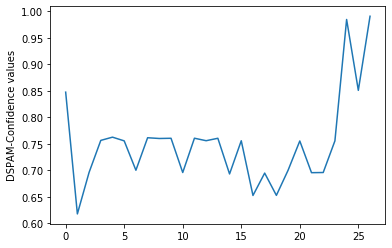

In [23]:
import matplotlib.pyplot as plt
plt.plot(elist)
plt.ylabel('DSPAM-Confidence values')
plt.show()